In this body of work, i will try to categorize about 400k non-merged pull requests.
First, we need to import the libraries.

In [11]:
pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12 dask-cudf-cu12 cuml-cu12 cugraph-cu12 cuspatial-cu12 cuproj-cu12 cuxfilter-cu12 cucim

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic
  Using cached cudf-cu12-23.8.0.tar.gz (6.8 kB)
  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /project/6033386/a2shamso/venv/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qxx1tu7m/cudf-cu12_3f2da2a1999e4a3583745c4dae97c715/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qxx1tu7m/cudf-cu12_3f2da2a1999e4a3583745c4dae97c715/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import set

In [10]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoModelForMaskedLM, BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup, AutoConfig, AutoModel, BertForSequenceClassification, BertConfig
import pandas as pd
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from torch.optim import Adam
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
# from cuml.manifold import TSNE
import cuml
import re
import ast
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt') 
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# import pytorch_lightning as pl
# from torchmetrics.functional import accuracy, f1_score, auroc
# from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
# from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from tqdm.auto import tqdm


ModuleNotFoundError: No module named 'cuml'

In [20]:
#reading the data
# df = pd.read_csv('/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/Sample_2_500_manual.csv')
df = pd.read_csv('/home/a2shamso/projects/def-m2nagapp/a2shamso/pr_classification/dataset/Sample_9000_manual.csv')

In [5]:
df.head()

,Unnamed: 0,repo_id,status,pr_id,pullreq_id,api_url,url,pr_url,pr_api_url,author_id,author_desc_body,closer_id,comments_counts,comments,commit_counts,code_changes_counts,created_at,closed_at,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,2250,6,not-merged,2697422,4651,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/4651,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1,1,2013-12-25T04:04:41Z,2013-12-25T05:41:54Z,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,5916,6,not-merged,7456135,11761,https://api.github.com/repos/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x,https://github.com/cocos2d/cocos2d-x/pull/11761,https://api.github.com/repos/cocos2d/cocos2d-x...,CocosRobot,\N,NaN,0,[],1,9,2015-05-08T09:07:16Z,2015-05-11T01:53:15Z,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,17935,183,not-merged,645270,2808,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,blanchonvincent,Usage with static instead of self\n,NaN,0,[],1,1,2012-10-19T19:34:23Z,2012-10-30T19:46:43Z,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,19620,183,not-merged,2203867,5219,https://api.github.com/repos/zendframework/zen...,https://github.com/zendframework/zendframework,https://github.com/zendframework/zendframework...,https://api.github.com/repos/zendframework/zen...,samsonasik,\N,NaN,3,"['Woah, ancient links spotting :O\n', '@Ocrami...",1,1,2013-10-03T19:34:04Z,2013-10-03T19:48:05Z,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,27952,340,not-merged,23622497,6647,https://api.github.com/repos/netty/netty,https://github.com/netty/netty,https://github.com/netty/netty/pull/6647,https://api.github.com/repos/netty/netty/pulls...,fenik17,Motivation:\r\n\r\n1. The use of the `Internet...,NaN,1,['Cherry-picked into 4.1 (970d310ec9ae3d0581ad...,1,3,2017-04-19T18:56:34Z,2017-04-20T03:23:50Z,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [22]:
#drop some of the columns
df = df.drop(['api_url','pullreq_id', ' url', 'pr_id','status', 'repo_id', 'Unnamed: 0', 'repo_id', 'comments_counts', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id','commit_counts', 'code_changes_counts', 'created_at', 'closed_at', 'author_country', 'author_continent', 'same_country', 'author_eth', 'closer_eth','closer_country', 'same_eth', 'prs_white', 'prs_black', 'prs_api', 'prs_hispanic', 'pri_white', 'pri_black', 'pri_api', 'pri_hispanic', 'prs_eth_7', 'prs_eth_8', 'prs_eth_9', 'prs_eth_diff', 'prs_eth_diff_2'], axis=1)

In [105]:
df.head(40)

,comments,manual_analysis
0,[No comments],No reason
1,[No comments],No reason
2,[No comments],No reason
3,"Woah, ancient links spotting :O I just reali...",No reason
4,Cherry-picked into 4.1 (Commit ID). thanks!,Successful
5,I have similar local patches in my project. De...,Chaotic
6,[No comments],No reason
7,2.1 needs to be merged into master and then th...,Unnecessary
8,why did you add the original tab? other than t...,No reason
9,[No comments],No reason


<Axes: xlabel='manual_analysis'>

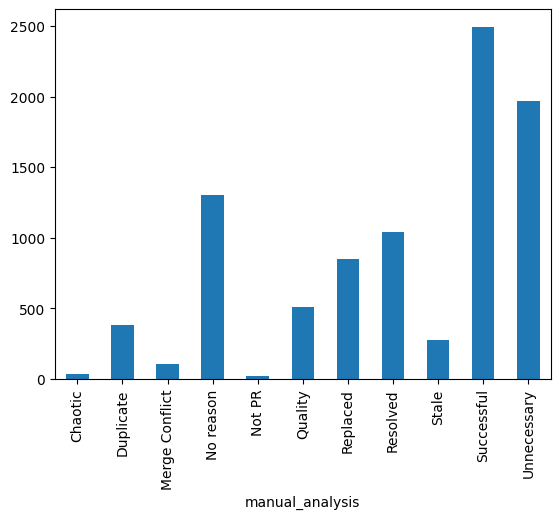

In [14]:
df.groupby(['manual_analysis']).size().plot.bar()

In [21]:
df.groupby(['manual_analysis']).size()

manual_analysis
Chaotic             38
Duplicate          383
Merge Conflict     104
No reason         1302
Not PR              20
Quality            507
Replaced           850
Resolved          1041
Stale              275
Successful        2494
Unnecessary       1972
dtype: int64

### cleaning the comments texts

In [23]:
def text_preprocess(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions
    # text = re.sub(r'#','',text) #remove # symbol
    #text = re.sub(r'https?:\/\/\S+','',text) #remove the hyper link
    text = re.sub(r'\n','',text) #remove \n
    # text = re.sub(r'www\S+', '', text) #remove www
    text = re.sub(r'\b([a-f0-9]{40})\b', 'Commit ID', text)
    text = re.sub(r'#(\d+)', 'pull request number' , text)
    text = re.sub(r'https://github\.com/[^/]+/[^/]+/pull/\d+', 'another pull request', text)

    return text

def sentence_segmentation(text):
    sentences = nltk.sent_tokenize(text)
    return sentences
    
df['comments'] = df['comments'].apply(lambda x: ast.literal_eval(x))
df['comments'] = df['comments'].apply(lambda x: [text_preprocess(t) for t in x])
df['comments'] = df['comments'].apply(lambda x: ' '.join(x))
df['comments'] = df['comments'].apply(lambda x: x if len(x) > 0 else '[No comments]')
df['comments'] = df['comments'].apply(lambda x: sentence_segmentation(x))
df['comments'] = df['comments'].apply(lambda x: ' '.join(x).strip())
# df['comments'] = df['comments'].apply(lambda x: re.sub(r'\[|\]', '', x))
df['comments'] = df['comments'].apply(lambda x: x.replace("\'", "'"))


In [7]:
df['comments'][35]

"thanks! usefull Commit ID adds this. https://github.com/zurb/foundation/commit/Commit ID Does not group checkboxes by name. Without that part of 's pull req it means we can't use abide to make a form that requires at least one checkbox option being selected from a group. It seems to me valid_checkbox should be using the code of valid_radio or if that is not the desired default functionality then would an option be possible? I agree, my original purpose was to add the option which check at least one option is checked any plans on this? Is there any news on this? Checking to see that one checkbox of a group is selected seem rather fundamental. Can't we vote to have this opened again? Has this been considered yet? +1 +1! This would be incredibly useful :) +1 Would be top. Check this SO question, it is possible if you write your own abide validator: http://stackoverflow.com/q/26890023/3780766 +1"

## Example


In [ ]:
#example
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = "why did you add the original tab? other than this this PR is :+1:   just touched that file to remove the else, if  don't want it, I reverted all changes to that file so the diff is clean"

bert_input = tokenizer(example_text, padding = 'max_length', max_length = 50, truncation = True, return_tensors = "pt")
print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[  101,  1725,  1225,  1128,  5194,  1103,  1560, 27629,  1830,   136,
          1168,  1190,  1142,  1142, 11629,  1110,   131,   116,   122,   131,
          1198,  4270,  1115,  4956,  1106,  5782,  1103,  1950,   117,  1191,
          1274,   112,   189,  1328,  1122,   117,   146, 17464,  1155,  2607,
          1106,  1115,  4956,  1177,  1103,  4267,  3101,  1110,  4044,   102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]])


In [ ]:
print(tokenizer.decode(bert_input.input_ids[0]))

[CLS] why did you add the original tab? other than this this PR is : + 1 : just touched that file to remove the else, if don't want it, I reverted all changes to that file so the diff is clean [SEP]


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.batch_encode_plus(
    df['comments'],
    max_length = 512,
    padding = 'max_length',
    return_attention_mask = True,
    return_token_type_ids = False,
    truncation=True,
    return_tensors = 'pt'
)

input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']




In [ ]:
tokens['input_ids'].shape, tokens['attention_mask'].shape

(torch.Size([500, 512]), torch.Size([500, 512]))

(0.0, 1000.0)

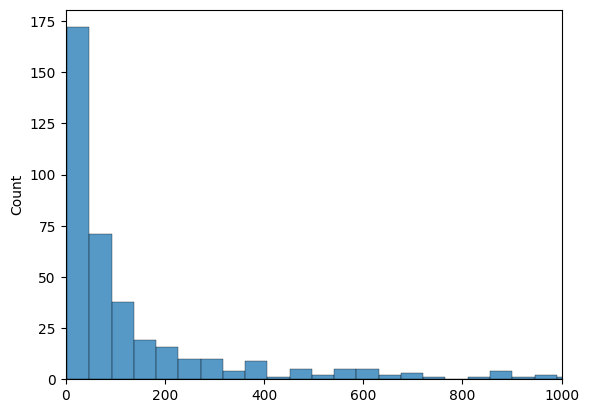

In [ ]:
#checking the number of tokens:
token_counts = []
for _, row in train_df.iterrows():
    token_count = len(tokenizer.encode(
        row['comments'],
        max_length = 20000,
        truncation = True,
    ))
    token_counts.append(token_count)

sns.histplot(token_counts)
plt.xlim([0, 1000])

In [ ]:
# #reshape input_ids to one dimension (20000)
# input_ids = input_ids.flatten()
# input_ids.shape

torch.Size([10000000])

In [ ]:
# tokenizer.convert_ids_to_tokens(tokens["input_ids"].flatten())[20:40]

['touched',
 'that',
 'file',
 'to',
 'remove',
 'the',
 'else',
 ',',
 'if',
 'don',
 "'",
 't',
 'want',
 'it',
 ',',
 'i',
 'reverted',
 'all',
 'changes',
 'to']

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')
# sample_batch = next(iter(DataLoader(train_dataset, batch_size=8, num_workers=2)))
# sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Creating the model
It is redundant if the other one works

In [ ]:
# class PRCommentDataModule(pl.LightningDataModule):
#     def __init__(self, train_df, test_df, tokenizer, batch_size=32, max_length=512):
#         super().__init__()
#         self.train_df = train_df
#         self.test_df = test_df
#         self.tokenizer = tokenizer
#         self.batch_size = batch_size
#         self.max_length = max_length
    
#     def setup(self, stage=None):
#         self.train_dataset = PRCommentDataset(self.train_df, self.tokenizer, self.max_length)
#         self.test_dataset = PRCommentDataset(self.test_df, self.tokenizer, self.max_length)

#     def train_dataloader(self):
#         return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle = True, num_workers=4)

#     def test_dataloader(self):
#         return DataLoader(self.test_dataset, batch_size=self.batch_size, num_workers=4)
    

    

In [ ]:

# class PRCommentClassifier(pl.LightningModule):
#     def __init__(self, n_classes = 11):
#         super().__init__()
#         self.model = BertModel.from_pretrained('bert-base-uncased', num_labels = n_classes)
#         self.n_classes = n_classes
    
#     def forward(self, input_ids, attention_mask, labels=None):
#         output = self.model(input_ids, attention_mask, labels=labels)
#         return output.loss.mean(), output.logits
#     def training_step(self, batch, batch_idx):
#         input_ids = batch["input_ids"]
#         attention_mask = batch["attention_mask"]
#         labels = batch["labels"]
#         loss, logits = self(input_ids, attention_mask, labels)
#         acc = accuracy_score(labels.cpu(), torch.argmax(logits.cpu(), dim=1))
#         self.log('train_loss', loss, prog_bar=True)
#         self.log('train_acc', acc, prog_bar=True)
#         return loss
    
#     def validation_step(self, batch, batch_idx):
#         input_ids = batch["input_ids"]
#         attention_mask = batch["attention_mask"]
#         labels = batch["labels"]
#         loss, logits = self(input_ids, attention_mask, labels)
#         acc = accuracy_score(labels.cpu(), torch.argmax(logits.cpu(), dim=1))
#         self.log('val_loss', loss, prog_bar=True)
#         self.log('val_acc', acc, prog_bar=True)
#         return loss
    
#     def test_step(self, batch, batch_idx):
#         input_ids = batch["input_ids"]
#         attention_mask = batch["attention_mask"]
#         labels = batch["labels"]
#         loss, logits = self(input_ids, attention_mask, labels)
#         acc = accuracy_score(labels.cpu(), torch.argmax(logits.cpu(), dim=1))
#         self.log('test_loss', loss, prog_bar=True)
#         self.log('test_acc', acc, prog_bar=True)
#         return loss
    
#     def configure_optimizers(self):
#         return AdamW(self.parameters(), lr=2e-5)



## New model

In [ ]:
#having the tokenization in a pytorch Dataset
class PRCommentDataset(Dataset):
    def __init__(self, df, tokenizer, max_length: 512):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        comment = self.df.loc[index, 'comments']
        labels = self.df.loc[index, 'label_encoded']
        encoding = self.tokenizer.encode_plus(
            comment,
            max_length = self.max_length,
            padding = 'max_length',
            truncation = True,
            return_attention_mask = True,
            return_token_type_ids = False,
            return_tensors = 'pt'
        )

        return dict(
            comment_text = comment,
            input_ids = encoding['input_ids'].flatten(),
            attention_mask = encoding['attention_mask'].flatten(),
            labels=torch.tensor(labels, dtype = torch.long)
        )
print(next(iter(PRCommentDataset(df, tokenizer, max_length=512))))


NameError: name 'tokenizer' is not defined

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased') 
config.num_labels = 10
model_pretrained = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)
dataset = PRCommentDataset(df, tokenizer, max_length=512)

# train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label_encoded'].values)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_pretrained.to(device)

optimizer = torch.optim.AdamW(model_pretrained.parameters(), lr=2e-5)
epochs = 5

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
torch.cuda.memory_reserved()

494927872

In [ ]:
# Training
criterion = nn.CrossEntropyLoss()
for epoch in tqdm(range(epochs)):
    model_pretrained.train()
    total_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model_pretrained(input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        loss = criterion(logits, labels)
        optimizer.step()

        total_loss += loss.item()
    average_train_loss = total_loss / len(train_loader)
    print(f"Epoch: {epoch+1}, training loss: {average_train_loss}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1, training loss: 2.3982286262512207
Epoch: 2, training loss: 2.402910060882568
Epoch: 3, training loss: 2.4054079961776735
Epoch: 4, training loss: 2.3963714408874512
Epoch: 5, training loss: 2.3980671310424806


In [ ]:
# Evaluation
model_pretrained.eval()
total_preds = []
total_labels = []
for batch in test_loader: 
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)

with torch.no_grad():
    outputs = model_pretrained(input_ids, attention_mask=attention_mask)
    preds = torch.argmax(outputs.logits, dim=1)

total_preds.extend(preds.cpu().numpy())
total_labels.extend(labels.cpu().numpy())

In [ ]:
#metrics
accuracy = accuracy_score(total_labels, total_preds)
precision = precision_score(total_labels, total_preds, average='macro')
recall = recall_score(total_labels, total_preds, average='macro') 
f1 = f1_score(total_labels, total_preds, average='macro')
cm = confusion_matrix(total_labels, total_preds)
report = classification_report(total_labels, total_preds, labels=list(range(10)))
print(f"Accuracy: {accuracy} Precision: {precision} Recall: {recall} F1-score: {f1}")
print(cm)
print(report)


Accuracy: 0.25 Precision: 0.08333333333333333 Recall: 0.3333333333333333 F1-score: 0.13333333333333333
[[0 2 0]
 [0 1 0]
 [0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

   micro avg       0.25      0.25      0.25         4
   macro avg       0.03      0.10      0.04         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

## Another approach

In [13]:
#having the tokenization in a pytorch Dataset
# le = LabelEncoder()
# df['label_encoded'] = le.fit_transform(df['manual_analysis'])

bert_model = BertClassifier()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
labels = {'No reason':0, 'Unnecessary':1, 'Replaced': 2, 'Merge Conflict':3,
       'Successful':4, 'Stale':5, 'Resolved':6, 'Quality':7, 'Duplicate':8,
       'Chaotic':9, 'Not PR':10}
class PRDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.labels = [labels[label] for label in df['manual_analysis']]
        self.comment = [tokenizer(comment, padding = 'max_length', max_length = 512, truncation = True,
                                  return_tensors = 'pt') for comment in df['comments']]
        self.bert_model = bert_model
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_comments(self, idx):
        return self.comment[idx]
    
    def __getitem__(self, idx):

        batch_comments = self.get_batch_comments(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_comments, batch_y
        


NameError: name 'BertClassifier' is not defined

In [35]:
bert_model = BertClassifier()  # Use your custom BERT model here
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the labels
labels = {'No reason': 0, 'Unnecessary': 1, 'Replaced': 2, 'Merge Conflict': 3,
          'Successful': 4, 'Stale': 5, 'Resolved': 6, 'Quality': 7, 'Duplicate': 8,
          'Chaotic': 9, 'Not PR': 10}

class PRDataset(torch.utils.data.Dataset):
    def __init__(self, df, bert_model, tokenizer):
        self.labels = [labels[label] for label in df['manual_analysis']]
        self.comments = df['comments'].tolist()  # Store the raw text comments
        self.tokenizer = tokenizer  # Use the provided tokenizer
        self.bert_model = bert_model

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        comment = self.comments[idx]

        # Tokenize and convert to input tensors
        inputs = self.tokenizer(comment, padding='max_length', max_length=512, truncation=True, return_tensors='pt')
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        with torch.no_grad():
            # Pass input through your custom BERT model to obtain embeddings
            embeddings = bert_model(input_ids, attention_mask)

        batch_y = self.labels[idx]

        return embeddings, batch_y, comment  # Return raw text comments as well



In [ ]:
# Create the dataset
df_sample = df.sample(n=1000, random_state= 1)
# dataset = PRDataset(df_train, bert_model, tokenizer)
dataset = PRDataset(df_sample, bert_model, tokenizer)

# Get feature vectors and labels
feature_vectors = []
labels = []
comments = []

for idx in range(len(dataset)):
    embeddings, label, comment = dataset[idx]
    feature_vectors.append(embeddings.numpy())
    labels.append(label)
    comments.append(comment)

feature_vectors = np.array(feature_vectors)
labels = np.array(labels)
comments = np.array(comments)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(feature_vectors.reshape(-1, feature_vectors.shape[-1]))

# Visualize the t-SNE results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()


In [17]:
np.random.seed(112)

df_train, df_remaining = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_remaining, test_size=0.5, random_state=42)
print(len(df_train),len(df_val), len(df_test))



6388 799 799


In [24]:
#Creating the model

class BertClassifier(nn.Module):

    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout1 = nn.Dropout(0.4)
        #self.dropout2 = nn.Dropout(0.1) # added another dropout layer
        self.linear = nn.Linear(self.bert.config.hidden_size, 11)
        # self.linear2 = nn.Linear(11, 11)  # added another linear layer    
        self.softmax = nn.Softmax(dim=1) # changed relu to softmax
        self.relu = nn.ReLU()
    def forward(self, input_id, mask):
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        pooled_output = self.dropout1(pooled_output)
        # pooled_output = self.relu(pooled_output)
        pooled_output = self.linear(pooled_output)
        # pooled_output = self.linear2(pooled_output)
        #pooled_output = self.dropout2(pooled_output) # added another dropout layer
        final_layer = self.softmax(pooled_output)
        return final_layer

In [7]:
#Training for the modified model
def train_modified(model, train_data, val_data, learning_rate, epochs):
    train_dataset, val_dataset = PRDataset(train_data), PRDataset(val_data)

    train_dataloader = DataLoader(train_dataset, batch_size = 2, shuffle = True)
    val_dataloader = DataLoader(val_dataset, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = learning_rate)

    model = model.to(device)
    criterion = criterion.to(device)
    
    # if use_cuda:
    #     model = model.cuda()
    #     criterion = criterion.cuda()
    for epoch_num in tqdm(range(epochs)):

        total_acc_train = 0
        total_loss_train = 0

        for train_input, train_label in train_dataloader:

            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
            # pooled_output = output.pooler_output
            # pooled_output = output[:, 0]

            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()
            
            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()
        
        total_acc_val = 0
        total_loss_val = 0

        with torch.no_grad():
            for val_input, val_label in val_dataloader:

                val_label = val_label.to(device).float()
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                # pooled_output = output[:, 0]
                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()
                
                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc
        
        print(
            f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}')
              
    




In [8]:
def evaluate(model, test_data):

    test = PRDataset(test_data)

    test_dataloader = DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    model = model.to(device)

    y_true = []
    y_pred = []
    total_acc_test = 0

    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            # Compute predictions
            batch_pred = output.argmax(dim=1).cpu().numpy()
            batch_true = test_label.cpu().numpy()

            y_pred.extend(batch_pred.tolist())
            y_true.extend(batch_true.tolist())

            # Compute accuracy
            acc = (batch_pred == batch_true).sum().item()
            total_acc_test += acc

    # Compute metrics
    accuracy = total_acc_test / len(test_data)
    report = classification_report(y_true, y_pred, zero_division=0)

    print(f'Test Accuracy: {accuracy:.3f}')
    print(f"Classification Report: {report}")



In [ ]:
model = BertClassifier()
train_modified(model, df_train, df_val, 1e-7, 20)

## Main

In [ ]:
torch.save(model.state_dict(), 'bert_model.pth')
